# Introduction to scikit learn (sklearn)

* This notebook demonstrates some of the useful functions of the beautiful Scikit Learn library

What we're going to cover:

0. An end-to-end Scikit learn workflow.
1. Getting the data ready.
2. Choose the right estimator/algorithm for our problem.
3. Fit the model and use it to make predictions on our data.
4. Evaluate the models.
5. Improve a model.
6. Save and load a trained model.
7. Putting it all together!

# 0. An end-to-end Scikit-learn workflow

In [1]:
import numpy as np
import pandas as pd
import sklearn
heart_disease=pd.read_csv('../pandas_section/heart-disease.csv')

In [13]:
# 1. Create X (features matrix)
X=heart_disease.drop('target', axis=1)

#Create Y (labels)
y=heart_disease['target']

In [4]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [14]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [15]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [94]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [34]:
clf.fit(X_train, y_train);

In [35]:
# Make a prediction

y_preds = clf.predict(X_test)
y_preds

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [36]:
y_test

8      1
86     1
157    1
51     1
114    1
      ..
84     1
0      1
249    0
85     1
259    0
Name: target, Length: 61, dtype: int64

In [37]:
# 4. Evaluate the model on the training and test data
clf.score(X_train, y_train)

1.0

In [38]:
# How does the models perform on the test data?
clf.score(X_test, y_test)

0.7868852459016393

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

NameError: name 'y_test' is not defined

In [40]:
confusion_matrix(y_test, y_preds)

array([[22,  6],
       [ 7, 26]])

In [41]:
accuracy_score(y_test, y_preds)

0.7868852459016393

In [42]:
# 5. Improve a model
# Try different amount of n-estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print (f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train, y_train )
    print(f"Models accuracy on test set: {clf.score(X_test,y_test)*100:.2f}%")
    print('')

Trying model with 10 estimators...
Models accuracy on test set: 85.25%

Trying model with 20 estimators...
Models accuracy on test set: 80.33%

Trying model with 30 estimators...
Models accuracy on test set: 88.52%

Trying model with 40 estimators...
Models accuracy on test set: 80.33%

Trying model with 50 estimators...
Models accuracy on test set: 81.97%

Trying model with 60 estimators...
Models accuracy on test set: 80.33%

Trying model with 70 estimators...
Models accuracy on test set: 78.69%

Trying model with 80 estimators...
Models accuracy on test set: 81.97%

Trying model with 90 estimators...
Models accuracy on test set: 81.97%



In [51]:
import tracemalloc

tracemalloc.start()

In [52]:
# 6. Save the model and load it.
import pickle

pickle.dump(clf, open('random_forest_model_1.pkl', 'wb')) #wb=write binary

/Users/modikai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ResourceWarning: unclosed file <_io.BufferedWriter name='random_forest_model_1.pkl'>
  after removing the cwd from sys.path.
Object allocated at (most recent call last):
  File "<ipython-input-52-9123b7dbb64c>", lineno 4
    pickle.dump(clf, open('random_forest_model_1.pkl', 'wb')) #wb=write binary


In [49]:
loaded_model=pickle.load(open('random_forest_model_1.pkl', 'rb'))

/Users/modikai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='random_forest_model_1.pkl'>
  """Entry point for launching an IPython kernel.
Object allocated at (most recent call last):
  File "<ipython-input-49-c238b3766bf3>", lineno 1
    loaded_model=pickle.load(open('random_forest_model_1.pkl', 'rb'))


In [55]:
loaded_model.score(X_test, y_test)

0.819672131147541

In [56]:
 # Can import warnings to filter all warnings
import warnings
warnings.filterwarnings('default')

In [58]:
import sklearn
sklearn.show_versions()


System:
    python: 3.7.6 (default, Jan  8 2020, 13:42:34)  [Clang 4.0.1 (tags/RELEASE_401/final)]
executable: /Users/modikai/opt/anaconda3/bin/python
   machine: Darwin-17.7.0-x86_64-i386-64bit

Python dependencies:
       pip: 20.0.2
setuptools: 46.0.0.post20200309
   sklearn: 0.22.1
     numpy: 1.18.1
     scipy: 1.4.1
    Cython: 0.29.15
    pandas: 1.0.1
matplotlib: 3.1.3
    joblib: 0.14.1

Built with OpenMP: True


## 1. Getting data ready for machine learning

Three things we have to do:
    1. Split the data into features and labels (usualyy `X` &`Y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [59]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
heart_disease.shape

(303, 14)

In [61]:
X=heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [62]:
y= heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [63]:
#split the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [65]:
X.shape

(303, 13)

### 1.1 Make sure data is all numerical

In [26]:
car_sales=pd.read_csv('../pandas_section/car-sales-extended.csv')

In [69]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [71]:
list(car_sales.columns.values) 


['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price']

In [77]:
car_sales.groupby(['Colour']).mean() 

,Odometer (KM),Doors,Price
Colour,,,
Black,133833.959596,4.020202,15972.212121
Blue,134751.822430,3.978193,16414.803738
Green,139715.683544,4.037975,14811.455696
Red,129575.691489,4.085106,15265.723404
White,126169.918919,4.019656,16192.090909


In [78]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [79]:
 # split into X/y
X=car_sales.drop("Price", axis=1)
y=car_sales['Price']

In [80]:
#split into training and test data
X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,  
                                                   test_size=0.2)

In [84]:
#Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X-test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [107]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [109]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [86]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [111]:
dummies=pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [112]:
# let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test=train_test_split(transformed_X,
                                                  y, 
                                                 test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [113]:
model.score(X_test, y_test)

0.3235867221569877

# 1.2 What to do with missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.


In [13]:
# Import car sales missing data
car_sales_missing = pd.read_csv("../pandas_section/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [15]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [6]:
# Create X & y
X =car_sales_missing.drop("Price", axis=1)
y=car_sales_missing["Price"]

In [7]:
# Let's try and convert it to munbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

In [8]:
X.head(10)

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
5,Honda,Red,42652.0,4.0
6,Toyota,Blue,163453.0,4.0
7,Honda,White,NaN,4.0
8,NaN,White,130538.0,4.0
9,Honda,Blue,51029.0,4.0


In [10]:
y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [12]:
#### Option 1: Fill missing data with pandas
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


##### Option 1: Fill mising data with Pandas

In [20]:
#df1 = df[df.isna().any(axis=1)]
#print (df1)

car_sales_missing[car_sales_missing.isna() .any(axis=1)]

,Make,Colour,Odometer (KM),Doors,Price
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
13,NaN,White,134181.0,4.0,11121.0
20,Toyota,NaN,124844.0,4.0,24130.0
21,Honda,NaN,30615.0,4.0,29653.0
...,...,...,...,...,...
974,NaN,White,155383.0,4.0,14345.0
975,Honda,NaN,22409.0,4.0,10429.0
983,Toyota,Red,NaN,4.0,14671.0
985,NaN,Blue,216250.0,4.0,9691.0


In [23]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [24]:
# Fill the "Make" column
car_sales_missing['Make'].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna('missing', inplace=True)

# FIll the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [25]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [26]:
# Remove row with missing Price value
car_sales_missing.dropna(inplace=True)

In [27]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [29]:
len(car_sales_missing) #lost 50 samples

950

In [31]:
X= car_sales_missing.drop("Price", axis=1)
y= car_sales_missing['Price']

In [35]:
# Let's try and convert it to munbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [34]:
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

## Option 2: Fill missing values with sklearn

In [18]:
car_sales_missing = pd.read_csv('../pandas_section/car-sales-extended-missing-data.csv')

In [19]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [20]:
# drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [21]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [22]:
# fill missing values with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# define columns
cat_features = ['Make', 'Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']

# create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_features)
    
])

# transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [23]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns=['Make', 'Colour', 'Doors','Odometer (KM)'])

In [24]:
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [25]:
car_sales_filled.isna().sum() #no more missing values

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [28]:
# Let's try and convert it to munbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [29]:
# Now we've got our data as numbers and filled (no missing values)
# let's fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.21990196728583944

In [27]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2. Choosing the right estimator/algorithm for our problem

sklearn uses estimators as antoher term for machine learning model or algorithm.

* Classification - predict whether a sample is one thing or another
* Regression - predicting a number

Step 1 - Check the sklearn machine learning map

![title](choosing_right_estimator.png)

## 2.1 Picking a machine learning model for a regression problem

In [3]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# How many samples?
len(boston_df)

506

In [7]:
# Let's try Ridge Regression model
from sklearn.linear_model import Ridge

# set up random seed
np.random.seed(42)

# create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# check the score of the Ridge model on test data
model.score(X_test, y_test)

0.6662221670168521

### How do we improve this score?
 What if Ridge is not working
 
 Let's refer back to the map

In [48]:
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test)

0.8654448653350507

# Wow great improvement

In [49]:
model.score(X_test, y_test)

0.6662221670168521

## 2.2 Choosing an estimator for a classification problem

check the ml map

In [10]:
heart_disease = pd.read_csv('../pandas_section/heart-disease.csv')

In [11]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
# Let's try Linear SVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

/Users/modikai/Dropbox/DS/ZTM/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [59]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [62]:
# Let's try RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.8688524590163934

In [9]:
# Let's try K Nearest Neighbors estimator class
from sklearn.neighbors import KNeighborsClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Instantiate Nearest Neighbors Classifier
clf = KNeighborsClassifier(n_neighbors=70)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

NameError: name 'train_test_split' is not defined

In [8]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### If you have structured data, ensemble methods generally give good results. For unstructured data, use deep learning or transfer learning.

## 3. Fit the model/algorithm on our data and use it to make predictions
### 3.1 Fitting the model

* `X = features, feature variables, data`
* `y = labels, targest, target variables`


In [113]:
# Let's try RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Instantiate Random Forest Classifier( training the machine learning model)
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (using what the machine has learnt)
clf.score(X_test, y_test)

0.8688524590163934

In [74]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [76]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

### 3.2 Make predictions using the machine learning model
2 ways to make prediction:
1. `predict()`
2. `predict_proba()`

In [78]:
# Use a trained model to make predictions
clf.predict(np.array([1,7,8,3,4]))

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [82]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [83]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [84]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [86]:
# Compare predictions to labels to evaluate model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8688524590163934

In [87]:
clf.score(X_test, y_test)

0.8688524590163934

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8688524590163934

# Make prediction with predict_proba()

In [90]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])


array([[0.88 , 0.12 ],
       [0.445, 0.555],
       [0.415, 0.585],
       [0.88 , 0.12 ],
       [0.195, 0.805]])

In [ ]:
# Let's predict() on the same data...
clf.predict(X_test)

In [91]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


`predict()` can also be used for regression models

In [112]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)


# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']


# Split into training and test data sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

# instantiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)



In [104]:
y_preds[0:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [106]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [107]:
# Compare the predictions to the true values
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

# 4. Evaluating the machine learning model

Three ways to evaluate sklearn models
1. Estimator `score` method
2. The `scoring` method
3. Problem-specofoc metric functions

### 4.1 Evaluating the model using the `score` method 

In [114]:
# Let's try RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Instantiate Random Forest Classifier( training the machine learning model)
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (using what the machine has learnt)
clf.score(X_test, y_test)

0.8688524590163934

In [115]:
clf.score(X_train, y_train)

1.0

In [116]:
clf.score(X_test, y_test)

0.8688524590163934

In [79]:
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test)

0.8654448653350507

In [120]:
rf.score( X_train, y_train)

0.9763520974033731

In [122]:
rf.score( X_train, y_train)

0.9763520974033731

## 4.2 Evaluate a model using the `scoring` parameter

In [123]:
from sklearn.model_selection import cross_val_score


from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)


X = heart_disease.drop('target', axis=1)
y = heart_disease['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)


clf.score(X_test, y_test);

In [124]:
clf.score(X_test, y_test)

0.8688524590163934

In [126]:
# cross validation trains the model on 5 different versions of training data and evaluate on 5 different versions of the test data.
cross_val_score(clf, X, y)

array([0.83606557, 0.90163934, 0.81967213, 0.83333333, 0.78333333])

In [127]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.83870968, 0.83870968, 0.93333333, 0.86666667,
       0.8       , 0.73333333, 0.83333333, 0.73333333, 0.86666667])

In [128]:
np.random.seed(42)

#single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of the 5=fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# compare the two
clf_single_score, clf_cross_val_score

(0.8688524590163934, 0.8281420765027322)

In [129]:
# Scoring paprameter set to None by default
cross_val_score(clf, X,y, cv=5, scoring=None)

array([0.83606557, 0.86885246, 0.78688525, 0.85      , 0.78333333])

In [131]:
# default scoring parameter of classifier = mean accuracy
clf.score(X,y)

0.9735973597359736

### 4.2.1 Classification model evaluatios metrics

1. Accuracy
2. Area under ROC curve
3. Confision matrix
4. Classification report

**Accuracy**

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)


In [40]:
np.mean(cross_val_score)

0.8248087431693989

In [41]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


In [42]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Area under the reciever operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models's false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive =. model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [43]:
# Create data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
from sklearn.metrics import roc_curve
# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)


(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [45]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [46]:
# Calculate fpr, tpr and threshold
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

In [47]:
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

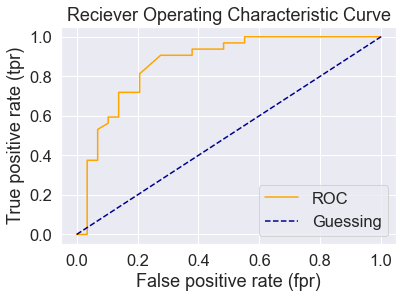

In [48]:
# Create a function for ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model"""
    
    #plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Reciever Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [49]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

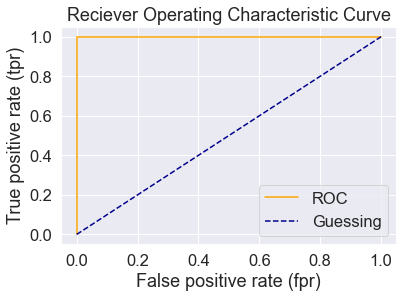

In [50]:
# plot perfect ROC curve and AUC score
fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [51]:
#perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

a confusion matrix is a quick way to compare the labels a model predicts and the actual label it was suppose to predict

In essence, giving you an idea of where the model s getting confused

In [52]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [53]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=['Actual label'],
           colnames=["Predicted label"])


Predicted label,0,1
Actual label,,
0,23,6
1,6,26


In [54]:
len(y_preds)

61

In [169]:
# how to install a conda package into the current enviroment directly from a jupyter notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.5
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/modikai/Dropbox/DS/ZTM/env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.8  |       hecd8cb5_0         121 KB
    certifi-2020.12.5          |   py38hecd8cb5_0         141 KB
    openssl-1.1.1i             |       h9ed2024_0         2.2 MB
    seaborn-0.11.0             |             py_0         210 KB
    ------------------------------------------------------------
                                           Total:         2.7 MB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.11.0-py_0

The following packages will be

In [55]:
! ls

Introduction_to_scikit_learn.ipynb  choosing_right_estimator.png
MNIST_from_scratch_with_Numpy.ipynb random_forest_model_1.pkl
Untitled.ipynb


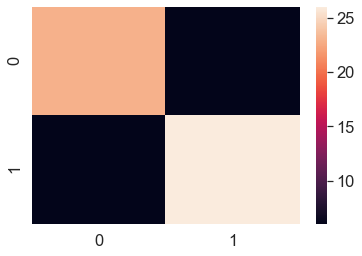

In [56]:
# Make our confusion matrix more visual with Seaborn's heat map
import seaborn as sns

#set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#plot it using Seaborn
sns.heatmap(conf_mat);

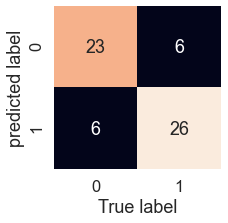

In [57]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborns's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat, 
                     annot=True, #Annotate the boxes with conf_mat info 
                     cbar=False)
    plt.ylabel("predicted label")
    plt.xlabel("True label");
    
plot_conf_mat(conf_mat)

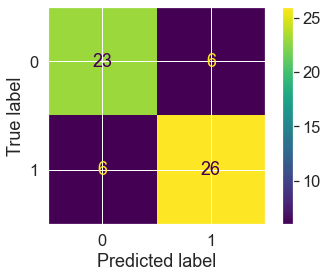

In [62]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)

## Classification Report

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [69]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0]=1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                 disease_preds,
                                 output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metric:

- **Accuracy** is a good measure to start wit if all the classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
- **Precision** and **recall** become more important when the classes are imbalanced.
- If false positive predictions are worse than flase negative. aim for higher precision.
- If false negative predictions are worse than false positives, aim for high recall.
- **F1-score** is a combination of precision and recall

## 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation-https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE) 

**R^2**

compares your models predictions to the mean of the targets. Values can range from negatice infinity (very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 values would be ). If your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [82]:
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
model.score(X_test, y_test)

0.8654448653350507

In [11]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [12]:
y_test.mean()

21.488235294117644

In [86]:
r2_score(y_test, y_test_mean)

0.0

In [87]:
r2_score(y_test, y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values. It gives your an idea of how wrong your models predictions are.

In [15]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [94]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})

df['differences'] = df['predicted values']-df['actual values']

In [95]:
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean squared error**

In [14]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [100]:
# Calculate MSE by hand
np.square(df["differences"]).mean()

9.867437068627442

### For Regression models, you want to minimize MAE, MSE and maximize R^2.

## 4.2.3 Finally using the `scoring` parameter

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [103]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5)

In [104]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:2f}%")

The cross-validated accuracy is: 82.480874%


In [108]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

In [109]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:2f}%")

The cross-validated accuracy is: 82.480874%


In [113]:
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
np.mean(cv_recall)

0.8484848484848484

In [111]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring = 'f1')
np.mean(cv_f1)

0.8298583662714097

In [112]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring = 'recall')
np.mean(cv_recall)

0.8484848484848484

How about our regression model?

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

model = RandomForestRegressor(n_estimators=100)

In [115]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring=None)
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [116]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring='r2')
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [117]:
np.mean(cv_r2)

0.6243870737930857

In [122]:
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
cv_mae

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

In [126]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [124]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse

array([ -7.97480422, -12.28179177, -22.18600986, -46.86720385,
       -18.37011596])

In [125]:
np.mean(cv_mse)

-21.535985132246157

## 4.3 Using different evaluation metrics as sklearn functions

**Classification evaluation functions**

In [135]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print( "Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")





Classifier metrics on the test set
 Accuracy: 85.245902%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression evaluation functions**

In [8]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions using our regression model
y_preds = model.predict(X_test)



In [16]:
# Evaluate the regression model
print("Regression model metrics on the test set")
print(f'R^2:{r2_score(y_test, y_preds)}')
print(f"MAE:{mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression model metrics on the test set
R^2:0.8654448653350507
MAE:2.136382352941176
MSE: 9.867437068627442


In [17]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 5. Imporving a model

First predictions = baseline model
First model = baseline model

From a data perspective:
* Could we collect more data? (generally, the more data the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameter vs. Parameters
* Parameters = model finds these patterns in data
* Hyperparameters = setting on a model you can adjust to (potentially) improve its ability to find patterns.

Three ways to adjust th hyperparameters:
1. By hand.
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearcCV

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [19]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand.

Let's make 3 sets, training, validation and test.

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [30]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_preds labels
    """
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuarcy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score:{f1:.2f}")
    
    return metric_dict
    

In [32]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled['target']

# Split the data into train, validation & test sets
train_split = round(0.7*len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15*len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

# Instatiate and fit the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on the validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 84.44%
Precision: 0.87
Recall: 0.90
F1 score:0.89


{'accuarcy': 0.84, 'precision': 0.87, 'recall': 0.9, 'f1': 0.89}

In [34]:
np.random.seed(42)

# Create a different classifier with different hyperparameter

clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with slightly different hyperparameters
y_preds_2 = clf_2.predict(X_valid) 

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds)

Accuracy: 84.44%
Precision: 0.87
Recall: 0.90
F1 score:0.89


## 5.2 Hyperparameter tuning with RandomizedSearcCV

In [36]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 100, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf": [1, 2, 4]}

# Split intto X & y
np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RnadomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,
                           verbose=2)

#fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   32.4s finished


In [38]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30}

In [39]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 86.89%
Precision: 0.88
Recall: 0.88
F1 score:0.88


## 5.3 Hyperparameter tuning with GridSearchCV

This is a brute force method that goes through all the grid options.

In [40]:
grid

{'n_estimators': [10, 100, 200, 500, 100, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [42]:
grid_2 = {"n_estimators": [100, 200, 500],
        "max_depth": [20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2],
        "min_samples_leaf": [2, 4]}

In [43]:
from sklearn.model_selection import GridSearchCV, train_test_split



np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid_2,
                            cv=5,
                            verbose=2)

#fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samp

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, total=   1.2s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, total=   1.1s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, total=   1.1s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, total=   1.2s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, total=   1.2s
[CV] n_estimators=500, min_samples_split=2, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   40.8s finished


In [44]:
gs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [45]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 86.89%
Precision: 0.88
Recall: 0.88
F1 score:0.88


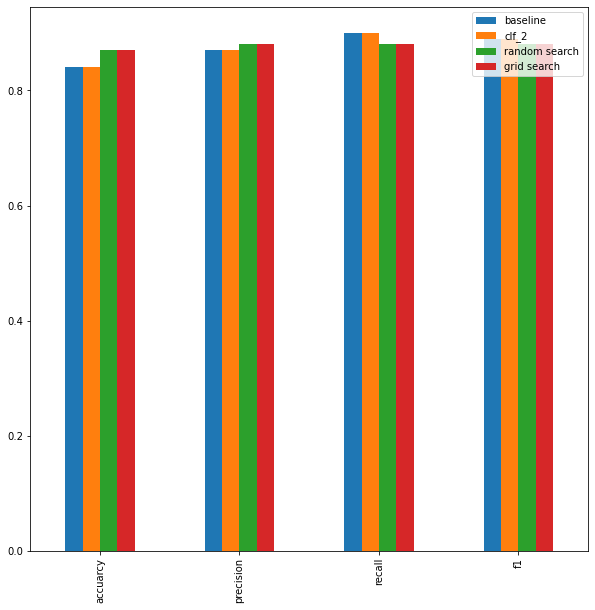

In [55]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10,10));

## 6. Saving and loading trained Machine Learning models.

Two ways to save and load machine learning model:
1. With Python's `pickle`  module
2. The `joblib` module

**Pickle**

In [58]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [59]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [60]:
pickle_y_preds = loaded_pickle_model.predict(X_test)

In [61]:
pickle_y_preds

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [63]:
evaluate_preds(y_test, pickle_y_preds);

Accuracy: 86.89%
Precision: 0.88
Recall: 0.88
F1 score:0.88


**Joblib**

In [64]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename='gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [67]:
# import a saved joblib model
loaded_joblib_model = load(filename='gs_random_forest_model_1.joblib')

In [69]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds);

Accuracy: 86.89%
Precision: 0.88
Recall: 0.88
F1 score:0.88


# 7. Putting it all together!

In [72]:
data = pd.read_csv("../pandas_section/car-sales-extended-missing-data.csv")

In [73]:
len(data)

1000

In [74]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to to (all in one cell):
1. Fill missing data
2. Convert data to number
3. Build a model on the data

In [88]:
# Getting the data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("../pandas_section/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value="missing")),
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4)) #Fill NAN in doors with average # = 4
])
numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='mean'))
])

# Setup preprocessing steps (fill missing values, then convert to number)
preprocessor = ColumnTransformer(
                    transformers=[
                        ('cat', categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])
# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y= data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [89]:
# Use GridSearchCV with our regression Pipeline

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators":[100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features":["auto"],
    "model__min_samples_split":[2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=2, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_featur

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   2.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   2.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_s

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   47.8s finished


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [90]:
gs_model.score(X_test, y_test)

0.3326319259744208